# Data Exploration Analysis 2 - Add. Visualizations

## Import packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#from tqdm import tqdm

# Load dataset

In [3]:
df = pd.read_csv("persondetections_202007092017.csv", delimiter=",")

### Overview of dataframe

In [4]:
#df.head(5)

### Convert timestamp to datetime

In [5]:
df["local_timestamp"] = pd.to_datetime(df["local_timestamp"])

### Check shape of dataframe

In [7]:
df.shape

(1561384, 20)

# Outlier Removal

## 1) Remove outliers and badly calibrated x/y_world points

In [8]:
# Remove outliers (negative y_world, and x/y_world > 15m)
df = df[(df['y_world']>=0) & (df['x_world']<=15) & (df['y_world']<=15)].reset_index()
df.shape

(1512601, 21)

### Group dataframe by POI_ID and PERSON_ID to make sure we look at data per person and per installation

In [9]:
df["in_or_out"] = 1 # We need to add initial labels of 1 for all rows, before adding 0s depending on actual presence within the next n steps

In [10]:
#df_group = df.groupby(['poi_id', 'person_id'], group_keys=False) # adding group_keys=False keeps the poi_id and person_id on all rows

#### Add a label column to the dataframe for later use (person presence in n steps: 1/0)

### Define custom functions
- to return total time present in seconds per person_id
- to add update the in/out in n steps label to 0 for relevant rows

In [11]:
def add_features(d, n=20):
    d.tail(n)["in_or_out"] = 0 # updates person presence label to 0 for all rows where presence stops n steps later
    d = d.sort_values(by='local_timestamp', ascending=True) # Making sure rows are sorted by time, so that total_time calculation makes sense

    total_time = max(d['local_timestamp']) - min(d['local_timestamp']) # Compute total time spent in zone by substracting start time from exit time
    d['total_time_spent_seconds'] = total_time.seconds # Convert time delta to integer 
    
    return d

In [12]:
# adding group_keys=False keeps the poi_id and person_id on all rows
new_data = df.groupby(['poi_id', 'person_id'], group_keys=False).apply(add_features) # applying all add_features functions to the grouped by dataframe
new_data.head(10)


,index,poi_id,person_id,person_put_id,camera_id,x_camera,y_camera,z_camera,looking_at_screen,rolling_exp_age,...,zone_label,is_in_zone,headpose_yaw,headpose_pitch,headpose_roll,x_world,y_world,z_world,in_or_out,total_time_spent_seconds
1164737,1202108,444,000608ce-98ea-4d12-9504-d9aca730f62d,38d323b5-4ea3-4040-ab9a-e2f0b86af36c,Camera: default,1.458717,-0.320510,4.281387,1,NaN,...,NaN,NaN,309.0,337.0,12.0,1.458717,3.786326,0.675961,0,5
1164741,1202112,444,000608ce-98ea-4d12-9504-d9aca730f62d,dfe00ffa-ef3e-4836-8017-01a894cc8725,Camera: default,1.476559,0.170611,3.410147,1,NaN,...,NaN,NaN,309.0,337.0,11.0,1.476559,2.787567,0.728279,0,5
1164745,1202116,444,000608ce-98ea-4d12-9504-d9aca730f62d,dc33fc1c-30f5-430e-9177-3dffa7edd006,Camera: default,1.508101,0.561246,2.724660,1,NaN,...,NaN,NaN,309.0,337.0,11.0,1.508101,1.999483,0.765876,0,5
1164749,1202120,444,000608ce-98ea-4d12-9504-d9aca730f62d,1a7e7a55-0fea-44b1-8f79-3f23e39e123a,Camera: default,1.524500,0.924791,2.173639,1,NaN,...,NaN,NaN,309.0,337.0,11.0,1.524500,1.339442,0.754277,0,5
1164753,1202124,444,000608ce-98ea-4d12-9504-d9aca730f62d,ed95f84b-eb89-47eb-82dd-b24d14f43744,Camera: default,1.541018,1.271221,1.715138,1,NaN,...,NaN,NaN,309.0,337.0,11.0,1.541018,0.766683,0.707539,0,5
1164756,1202127,444,000608ce-98ea-4d12-9504-d9aca730f62d,f0d77459-4e5d-4353-9363-6f24ec9b05dc,Camera: default,1.557537,1.617652,1.256638,1,NaN,...,NaN,NaN,309.0,337.0,11.0,1.557537,0.193925,0.660802,0,5
6428,6554,444,0047d246-d473-45a7-9876-c2c276606be7,d3db0115-c628-4487-bb9d-1f12e2998a1c,Camera: default,0.349719,0.655849,2.002769,1,NaN,...,NaN,NaN,NaN,NaN,NaN,0.349719,1.339327,1.072908,0,14
6431,6557,444,0047d246-d473-45a7-9876-c2c276606be7,288383cd-17aa-4180-8202-9c134a8ef678,Camera: default,-0.444591,0.238398,2.692469,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.444591,2.145338,1.055692,0,14
6434,6560,444,0047d246-d473-45a7-9876-c2c276606be7,7058a6df-b76e-4836-9033-905d9e647cbf,Camera: default,-0.742142,-0.420503,3.776801,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.742142,3.413923,1.030815,0,14
6437,6563,444,0047d246-d473-45a7-9876-c2c276606be7,1302a20b-209b-42c0-8b4c-e76b847474d6,Camera: default,-0.682079,-1.124017,4.854117,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.682079,4.700495,1.047362,0,14


In [13]:
# Check balance of the in(1)/out(0) label data:
new_data["in_or_out"].value_counts()

0    785256
1    727345
Name: in_or_out, dtype: int64

### Check distribution of total time spent in seconds per person_id

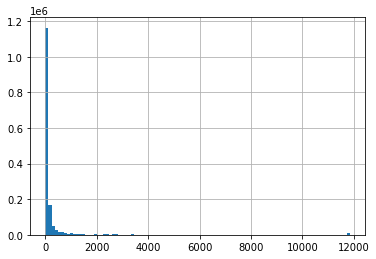

In [14]:
new_data["total_time_spent_seconds"].hist(bins=100)
None

In [15]:
# Check distribution of time spent per person
new_data["total_time_spent_seconds"].describe()

count    1.512601e+06
mean     2.313182e+02
std      1.076372e+03
min      0.000000e+00
25%      1.700000e+01
50%      5.000000e+01
75%      1.100000e+02
max      1.184700e+04
Name: total_time_spent_seconds, dtype: float64

In [16]:
# Check median total time spent before cleaning
new_data["total_time_spent_seconds"].median()

50.0

In [17]:
new_data["poi_id"].unique()

array([444, 450, 453, 456, 457, 466, 529])

### Define custom function to return outlier range (in terms of total time spent)

In [18]:
# define function to return outlier range
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

# retun outlier lower and upper bands for verification
lowerbound,upperbound = outlier_treatment(new_data["total_time_spent_seconds"])

print(lowerbound)
print(upperbound)

if lowerbound < 5:
    lowerbound = float(5) # based on our understanding of the real world situation, we chose 5sec and 2min boundaries
if upperbound > 120:
    upperbound = float(120) # confirmed by company team

print(lowerbound)
print(upperbound)    

-122.5
249.5
5.0
120.0


### Check dataframe shape before removing time spent outliers

In [19]:
new_data.shape

(1512601, 23)

In [20]:
#new_data.head(10)

## 2) Remove time-spent outliers based on range above

In [21]:
# Filter time outliers ()

filtered_data = new_data.loc[(new_data['total_time_spent_seconds']>lowerbound) & (new_data['total_time_spent_seconds']<upperbound)]
print(filtered_data.shape)
filtered_data.head(10)

(1077624, 23)


,index,poi_id,person_id,person_put_id,camera_id,x_camera,y_camera,z_camera,looking_at_screen,rolling_exp_age,...,zone_label,is_in_zone,headpose_yaw,headpose_pitch,headpose_roll,x_world,y_world,z_world,in_or_out,total_time_spent_seconds
6428,6554,444,0047d246-d473-45a7-9876-c2c276606be7,d3db0115-c628-4487-bb9d-1f12e2998a1c,Camera: default,0.349719,0.655849,2.002769,1,NaN,...,NaN,NaN,NaN,NaN,NaN,0.349719,1.339327,1.072908,0,14
6431,6557,444,0047d246-d473-45a7-9876-c2c276606be7,288383cd-17aa-4180-8202-9c134a8ef678,Camera: default,-0.444591,0.238398,2.692469,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.444591,2.145338,1.055692,0,14
6434,6560,444,0047d246-d473-45a7-9876-c2c276606be7,7058a6df-b76e-4836-9033-905d9e647cbf,Camera: default,-0.742142,-0.420503,3.776801,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.742142,3.413923,1.030815,0,14
6437,6563,444,0047d246-d473-45a7-9876-c2c276606be7,1302a20b-209b-42c0-8b4c-e76b847474d6,Camera: default,-0.682079,-1.124017,4.854117,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.682079,4.700495,1.047362,0,14
6476,6602,444,0047d246-d473-45a7-9876-c2c276606be7,52a76096-b754-4826-b482-afab9798a479,Camera: default,-0.613934,-1.832239,5.929436,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.613934,5.987905,1.068954,0,14
6479,6605,444,0047d246-d473-45a7-9876-c2c276606be7,690ce681-a74c-499b-990a-df5ff468dabf,Camera: default,-0.629902,-2.253646,6.595725,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.629902,6.776272,1.067626,0,14
6482,6608,444,0047d246-d473-45a7-9876-c2c276606be7,6dfdc32e-81ac-4088-a322-dc3e98585681,Camera: default,-0.540296,-2.720895,7.230111,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.540296,7.562274,1.122097,0,14
6486,6612,444,0047d246-d473-45a7-9876-c2c276606be7,35ca3310-8806-422d-b33b-453581192f44,Camera: default,-0.619272,-3.034268,7.875946,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.619272,8.275473,1.040523,0,14
6489,6615,444,0047d246-d473-45a7-9876-c2c276606be7,00c40b3c-86f9-4c68-8f59-88e60bd315da,Camera: default,-0.681717,-3.506173,8.565949,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.681717,9.110926,1.069116,0,14
6492,6618,444,0047d246-d473-45a7-9876-c2c276606be7,730b2410-4702-4696-af9b-2a347f9c5ec6,Camera: default,-0.794263,-4.022823,9.536606,1,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.794263,10.207300,0.985070,0,14


In [22]:
filtered_data["total_time_spent_seconds"].describe()

count    1.077624e+06
mean     4.389271e+01
std      3.133396e+01
min      6.000000e+00
25%      1.600000e+01
50%      3.700000e+01
75%      6.600000e+01
max      1.190000e+02
Name: total_time_spent_seconds, dtype: float64

# Feature Engineering

### Define custom function to compute new feature: velocity per person_id trajectory

#### Also adding other additional features for modeling:  
- x_velocity
- y_velocity
- distance_to_camera

In [23]:
def compute_velocity(df):
    # d = d.sort_values(by='local_timestamp', ascending=True) #already sorted the df in the previous custom function
    d = df.copy()
    # compute x_world_shifted, delta x, y_world_shifted, delta y, velocity
    d["x_world_shift"] = d["x_world"].shift(-1)
    d["dx_world"] = d["x_world_shift"] - d["x_world"]

    d["y_world_shift"] = d["y_world"].shift(-1)
    d["dy_world"] = d["y_world_shift"] - d["y_world"]

    # compute time shift, time dela
    d["timestamp_shift"] = d["local_timestamp"].shift(-1)
    d["d_time"] = d["timestamp_shift"] - d["local_timestamp"]
    d["d_time"] = d["d_time"].apply(lambda x: x.seconds)
    
    # compute x_velocity, y_velocity, velocity
    d["x_velocity"] = (d["x_world_shift"] - d["x_world"]) / d["d_time"]
    d["y_velocity"] = (d["y_world_shift"] - d["y_world"]) / d["d_time"]
    d["velocity"] = np.sqrt(d.dx_world ** 2 + d.dy_world ** 2) / d["d_time"]
    # here, camera is assumed to be at 0,0
    # compute distance to camera
    d["distance_to_camera"] = np.sqrt(d.x_world ** 2 + d.y_world ** 2)
    
    d["ema_5_x"] = d["x_velocity"].ewm(span=5).mean()
    d["ema_5_y"] = d["y_velocity"].ewm(span=5).mean()
    d["ema_5_velocity"] = d["velocity"].ewm(span=5).mean()
    
    d["ema_10_x"] = d["x_velocity"].ewm(span=10).mean()
    d["ema_10_y"] = d["y_velocity"].ewm(span=10).mean()
    d["ema_10_velocity"] = d["velocity"].ewm(span=10).mean()
    
    # drop now useless x_world/y_world shift columns
    d = d.drop(["x_world_shift", "y_world_shift"], axis=1)

    # Original dataset had 1 second time delta (d_time) between two positions (x, y), but outlier removal has created some longer time deltas.
    # We conservatively assume none of them should be longer than 5 seconds. We thus filter below:
    d = d.loc[(d["d_time"] > 0) & (d["d_time"] < 5)]

    return d

In [24]:
df_final = compute_velocity(filtered_data)
df_final.head(10)

,index,poi_id,person_id,person_put_id,camera_id,x_camera,y_camera,z_camera,looking_at_screen,rolling_exp_age,...,x_velocity,y_velocity,velocity,distance_to_camera,ema_5_x,ema_5_y,ema_5_velocity,ema_10_x,ema_10_y,ema_10_velocity
6428,6554,444,0047d246-d473-45a7-9876-c2c276606be7,d3db0115-c628-4487-bb9d-1f12e2998a1c,Camera: default,0.349719,0.655849,2.002769,1,NaN,...,-0.794310,0.806011,1.131629,1.384232,-0.794310,0.806011,1.131629,-0.794310,0.806011,1.131629
6431,6557,444,0047d246-d473-45a7-9876-c2c276606be7,288383cd-17aa-4180-8202-9c134a8ef678,Camera: default,-0.444591,0.238398,2.692469,1,NaN,...,-0.297551,1.268585,1.303014,2.190921,-0.496255,1.083556,1.234460,-0.521093,1.060427,1.225891
6434,6560,444,0047d246-d473-45a7-9876-c2c276606be7,7058a6df-b76e-4836-9033-905d9e647cbf,Camera: default,-0.742142,-0.420503,3.776801,1,NaN,...,0.060063,1.286572,1.287973,3.493658,-0.232736,1.179721,1.259808,-0.287472,1.151336,1.250847
6437,6563,444,0047d246-d473-45a7-9876-c2c276606be7,1302a20b-209b-42c0-8b4c-e76b847474d6,Camera: default,-0.682079,-1.124017,4.854117,1,NaN,...,0.068145,1.287409,1.289212,4.749725,-0.107755,1.224453,1.272022,-0.170312,1.196166,1.263487
6476,6602,444,0047d246-d473-45a7-9876-c2c276606be7,52a76096-b754-4826-b482-afab9798a479,Camera: default,-0.613934,-1.832239,5.929436,1,NaN,...,-0.015968,0.788368,0.788529,6.019295,-0.072519,1.057046,1.086416,-0.126004,1.079098,1.127139
6479,6605,444,0047d246-d473-45a7-9876-c2c276606be7,690ce681-a74c-499b-990a-df5ff468dabf,Camera: default,-0.629902,-2.253646,6.595725,1,NaN,...,0.089606,0.786002,0.791093,6.805486,-0.013276,0.958003,0.978501,-0.070003,1.002971,1.039857
6482,6608,444,0047d246-d473-45a7-9876-c2c276606be7,6dfdc32e-81ac-4088-a322-dc3e98585681,Camera: default,-0.540296,-2.720895,7.230111,1,NaN,...,-0.078976,0.713198,0.717558,7.581551,-0.036537,0.871328,0.886113,-0.072165,0.933147,0.962195
6486,6612,444,0047d246-d473-45a7-9876-c2c276606be7,35ca3310-8806-422d-b33b-453581192f44,Camera: default,-0.619272,-3.034268,7.875946,1,NaN,...,-0.062445,0.835453,0.837783,8.298611,-0.045524,0.858884,0.869349,-0.069954,0.910921,0.933891
6489,6615,444,0047d246-d473-45a7-9876-c2c276606be7,00c40b3c-86f9-4c68-8f59-88e60bd315da,Camera: default,-0.681717,-3.506173,8.565949,1,NaN,...,-0.112547,1.096375,1.102136,9.136394,-0.068462,0.940162,0.949017,-0.079220,0.951270,0.970495
6492,6618,444,0047d246-d473-45a7-9876-c2c276606be7,730b2410-4702-4696-af9b-2a347f9c5ec6,Camera: default,-0.794263,-4.022823,9.536606,1,NaN,...,-0.018531,0.694882,0.695129,10.238156,-0.051524,0.856959,0.862894,-0.066472,0.897414,0.912653


## Feature Selection

## Create sub-dataframes for each POI/Installation

In [25]:
installation = [444, 450, 453, 456, 457, 466, 529]
df_inst = []

for i in installation:
    df_temp = df_final.loc[df_final["poi_id"]== i]
    df_inst.append( df_temp)

In [26]:
df_inst1 = df_inst[0]
df_inst2 = df_inst[1]
df_inst3 = df_inst[2]
df_inst4 = df_inst[3]
df_inst5 = df_inst[4]
df_inst6 = df_inst[5]
df_inst7 = df_inst[6]

## Plot correlation matrix of all features per installation

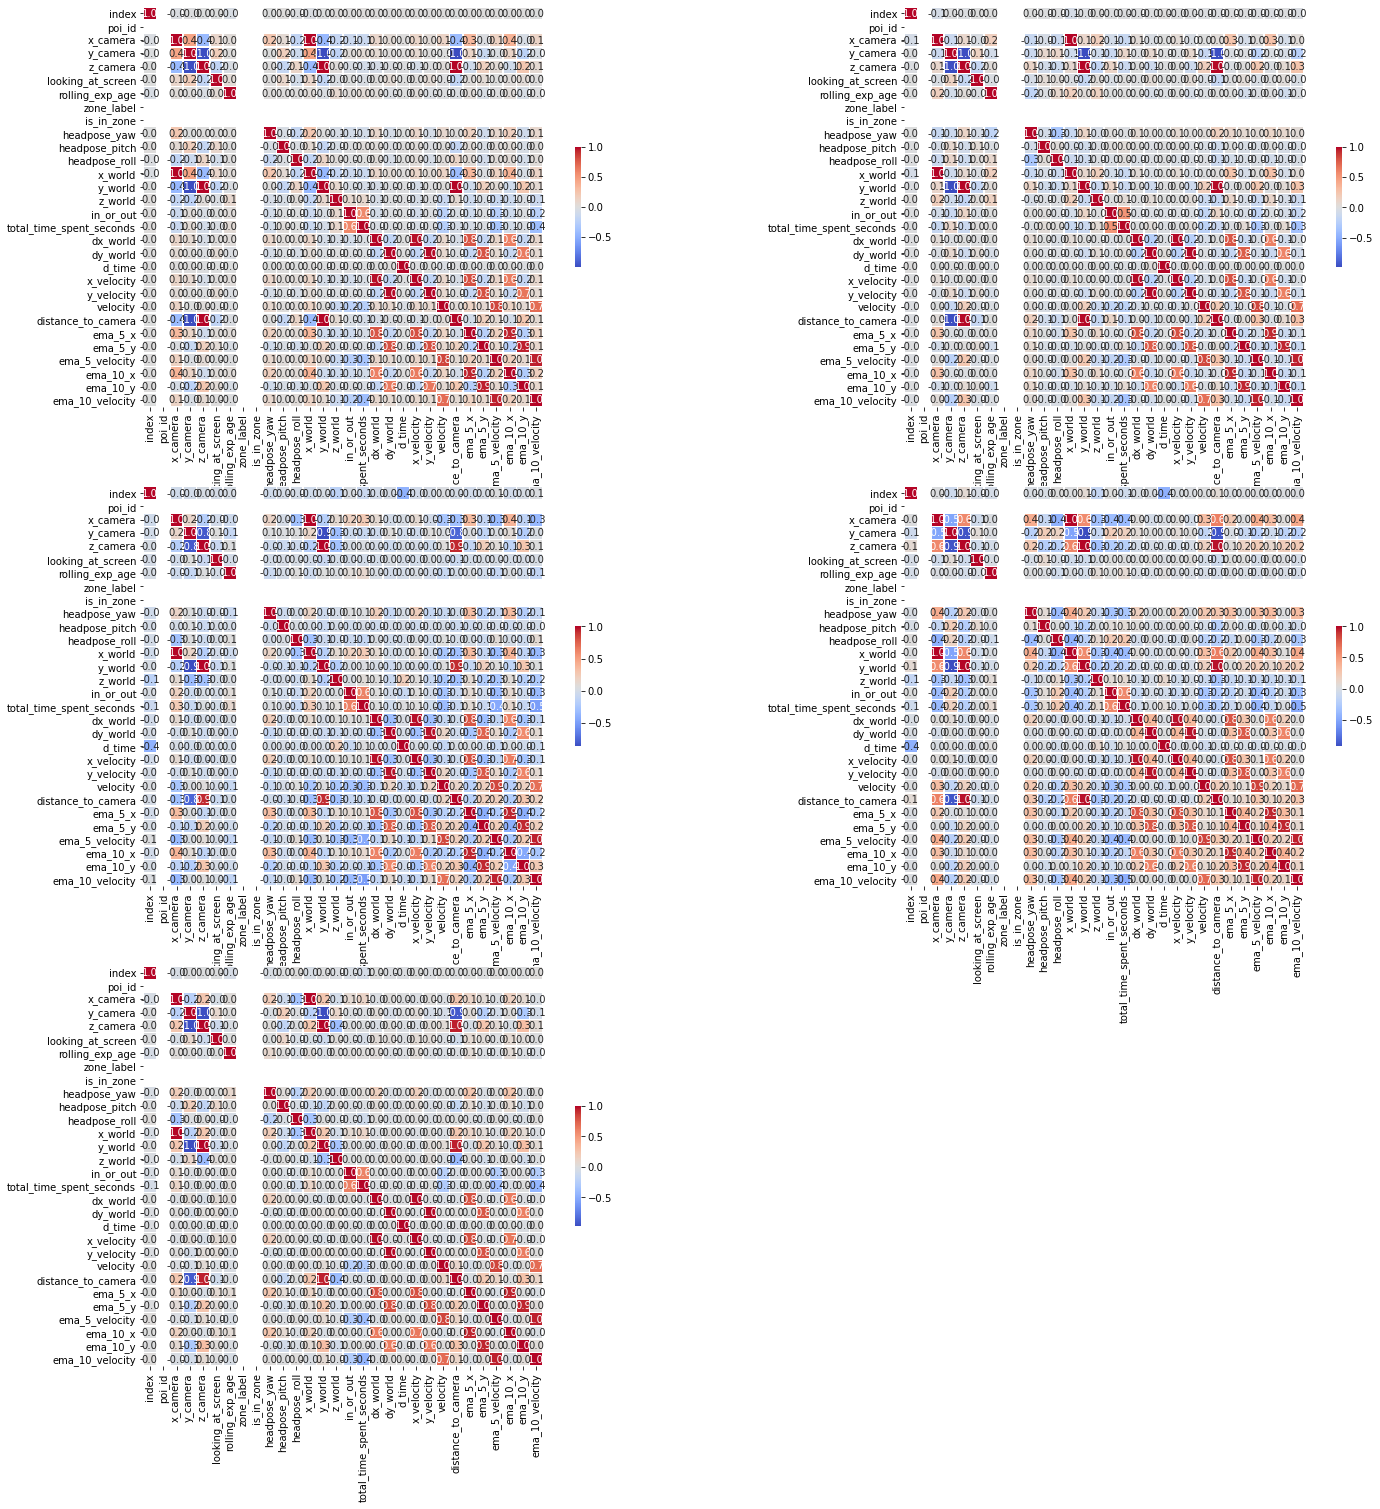

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Here we create a figure instance, and two subplots
fig = plt.figure(figsize = (25,25)) # width x height
ax1 = fig.add_subplot(3, 2, 1) # row, column, position
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)

# We use ax parameter to tell seaborn which subplot to use for this plot

sns.heatmap(data=df_inst1.corr(), ax=ax1, cmap="coolwarm", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 10}, fmt=".1f", linewidth=0.5)
sns.heatmap(data=df_inst2.corr(), ax=ax2, cmap="coolwarm", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 10}, fmt=".1f", linewidth=0.5)
sns.heatmap(data=df_inst3.corr(), ax=ax3, cmap="coolwarm", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 10}, fmt=".1f", linewidth=0.5)
sns.heatmap(data=df_inst4.corr(), ax=ax4, cmap="coolwarm", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 10}, fmt=".1f", linewidth=0.5)
sns.heatmap(data=df_inst5.corr(), ax=ax5, cmap="coolwarm", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 10}, fmt=".1f", linewidth=0.5)
None

- We can see zone_label and is_in_zone are empty for our 6 installation dataset
- x_camera is highly correlated to x_world, and y_camera/z_camera are highly correlated to y_world
- distance_to_camera is highly correlated to y_world  

##### Features to drop:
- zone_label (always NaN)
- is_in_zone (always Nan)
- x_camera
- y_camera
- z_camera  

- distance_to_camera (needed for plotting, so we'll drop it later)
- camera_id (always "default")
- person_put_id (deprecated)
- unique_person_id (deprecated)

In [28]:
df_final = df_final.drop(
    [
        "camera_id",  # always default
        "is_in_zone",
        "zone_label",  # always NaN
        "x_camera",
        "z_camera",
        "y_camera",  # correlation >0.9 with x/y_world
        "unique_person_id",
        "person_put_id",  # not relevant according to company
    ],
    axis=1,
)

### Split df_final into dataframes per installation

In [29]:
df_inst1 = df_final.loc[df_final["poi_id"]== 444]
df_inst2 = df_final.loc[df_final["poi_id"]== 450]
df_inst3 = df_final.loc[df_final["poi_id"]== 453]
df_inst4 = df_final.loc[df_final["poi_id"]== 456]
df_inst5 = df_final.loc[df_final["poi_id"]== 466]

### Plot feature correlation per installation, post feature-selection

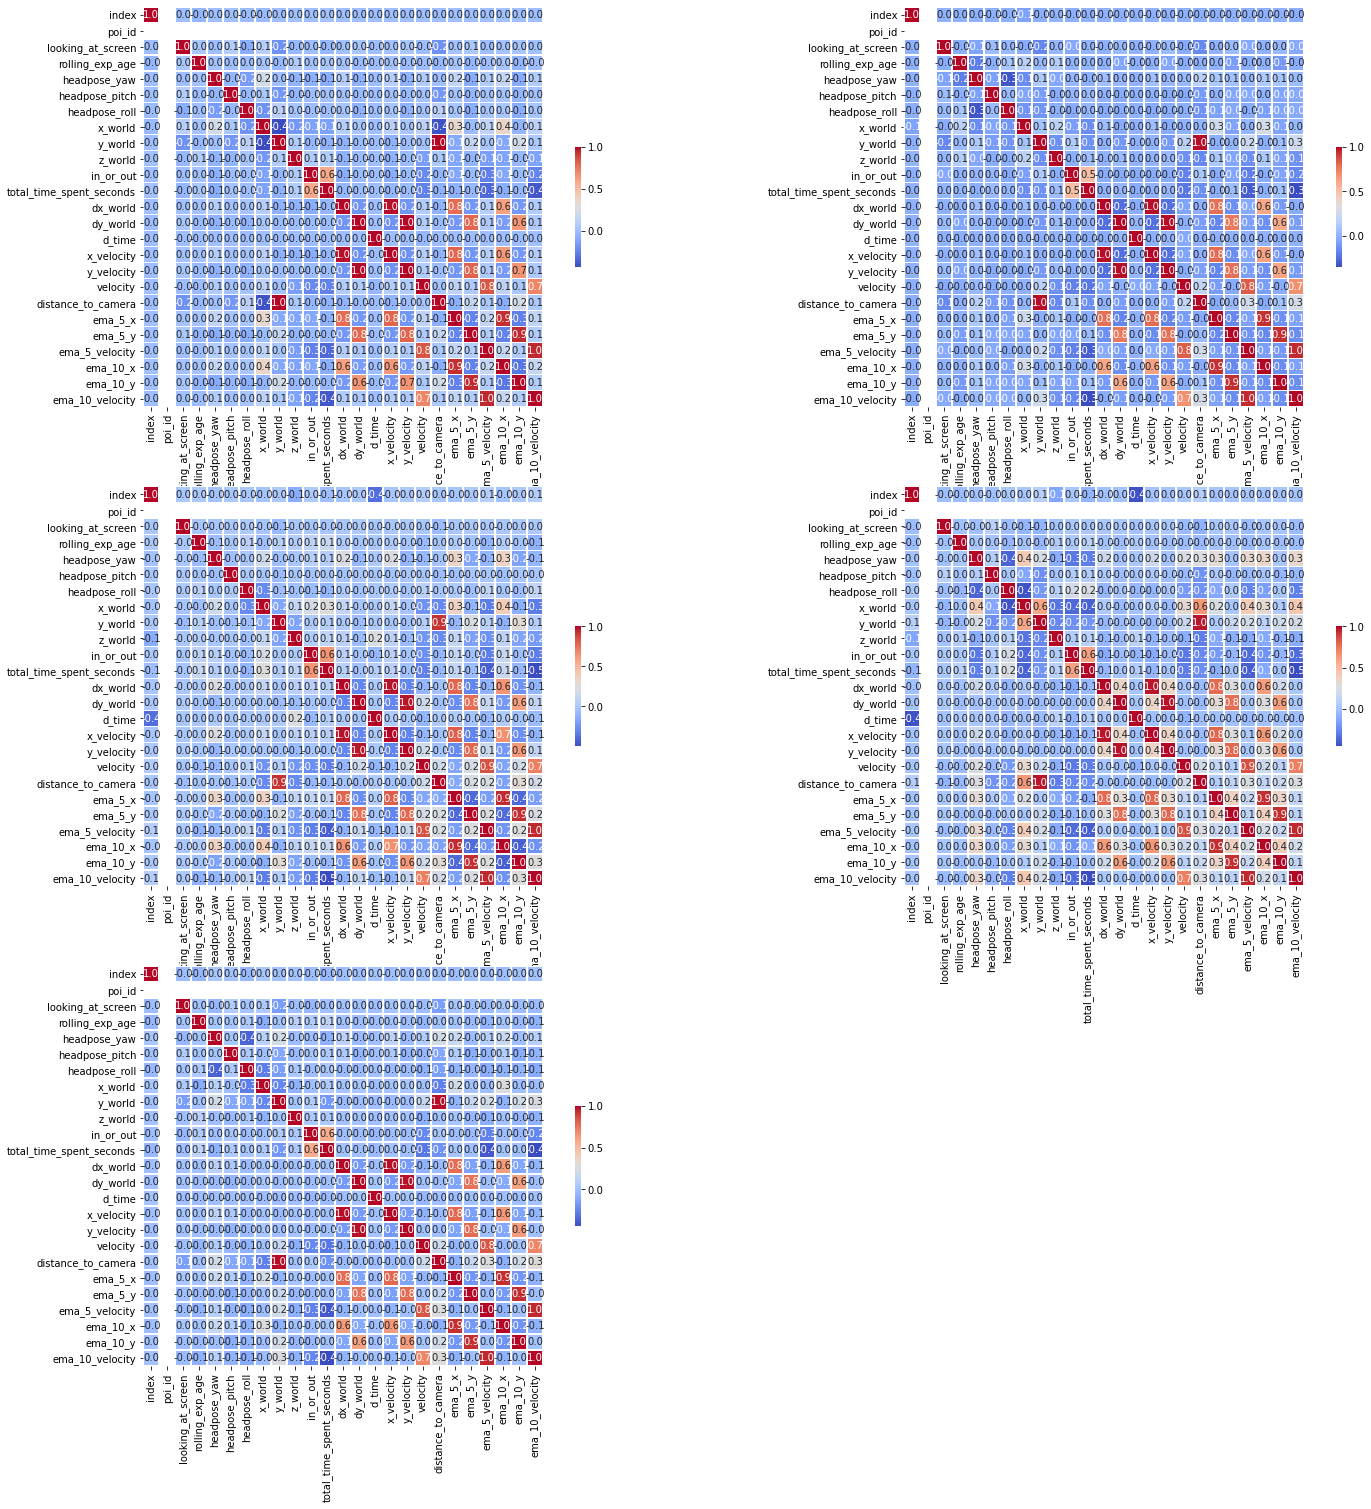

In [30]:
# Here we create a figure instance, and two subplots
fig = plt.figure(figsize = (25,25)) # width x height
ax1 = fig.add_subplot(3, 2, 1) # row, column, position
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)

# We use ax parameter to tell seaborn which subplot to use for this plot

sns.heatmap(data=df_inst1.corr(), ax=ax1, cmap="coolwarm", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 10}, fmt=".1f", linewidth=0.5)
sns.heatmap(data=df_inst2.corr(), ax=ax2, cmap="coolwarm", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 10}, fmt=".1f", linewidth=0.5)
sns.heatmap(data=df_inst3.corr(), ax=ax3, cmap="coolwarm", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 10}, fmt=".1f", linewidth=0.5)
sns.heatmap(data=df_inst4.corr(), ax=ax4, cmap="coolwarm", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 10}, fmt=".1f", linewidth=0.5)
sns.heatmap(data=df_inst5.corr(), ax=ax5, cmap="coolwarm", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 10}, fmt=".1f", linewidth=0.5)
None

#### A lot of our engineered features are highly multicolinear, but we will use them selectively in our model, so we don't drop them for now

## Checking for NaN values left

In [31]:
df_final.isna().sum()

index                            0
poi_id                           0
person_id                        0
looking_at_screen                0
rolling_exp_age             328060
rolling_exp_gender          328060
local_timestamp                  0
headpose_yaw                201354
headpose_pitch              201354
headpose_roll               201354
x_world                          0
y_world                          0
z_world                          0
in_or_out                        0
total_time_spent_seconds         0
dx_world                         0
dy_world                         0
timestamp_shift                  0
d_time                           0
x_velocity                       0
y_velocity                       0
velocity                         0
distance_to_camera               0
ema_5_x                          0
ema_5_y                          0
ema_5_velocity                   0
ema_10_x                         0
ema_10_y                         0
ema_10_velocity     

**We have about 1/4 of rolling exp age/gender data that is NaN, and about 12% of headpose(1-2-3) data that is NaN**
  
**Do we drop them, or do we impute them, for example by using the mean value of their respective column?**

# Visualizations

## Plot histograms of our cleaned up df_final features

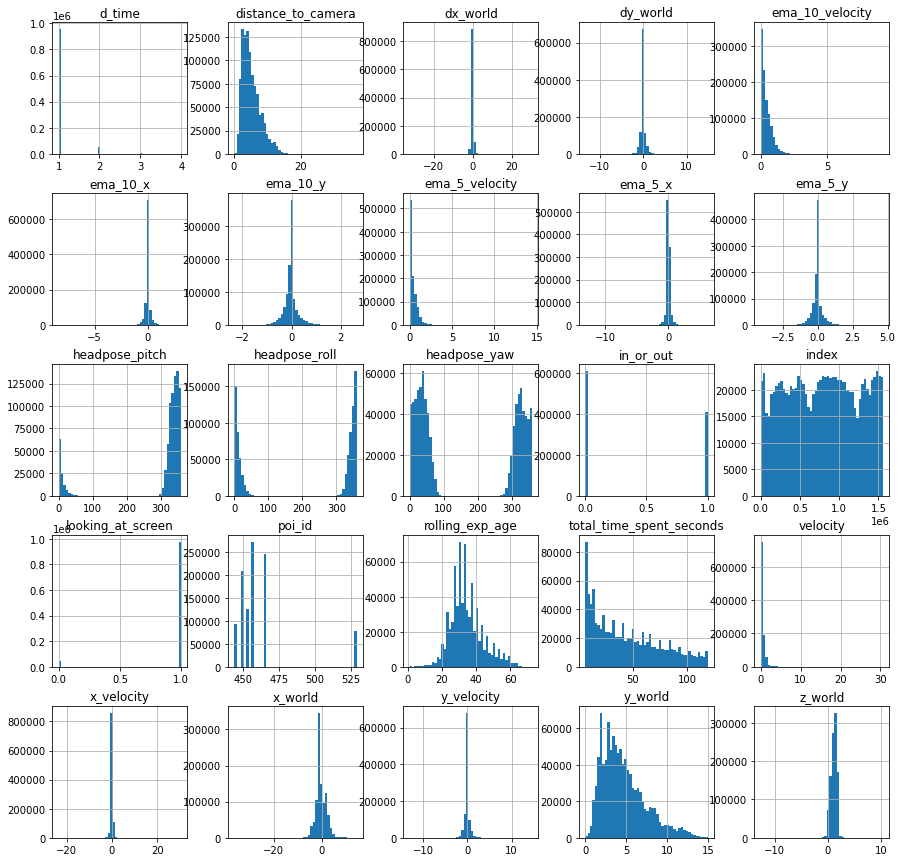

In [32]:
df_final.hist(figsize=(15, 15), bins=50)
None

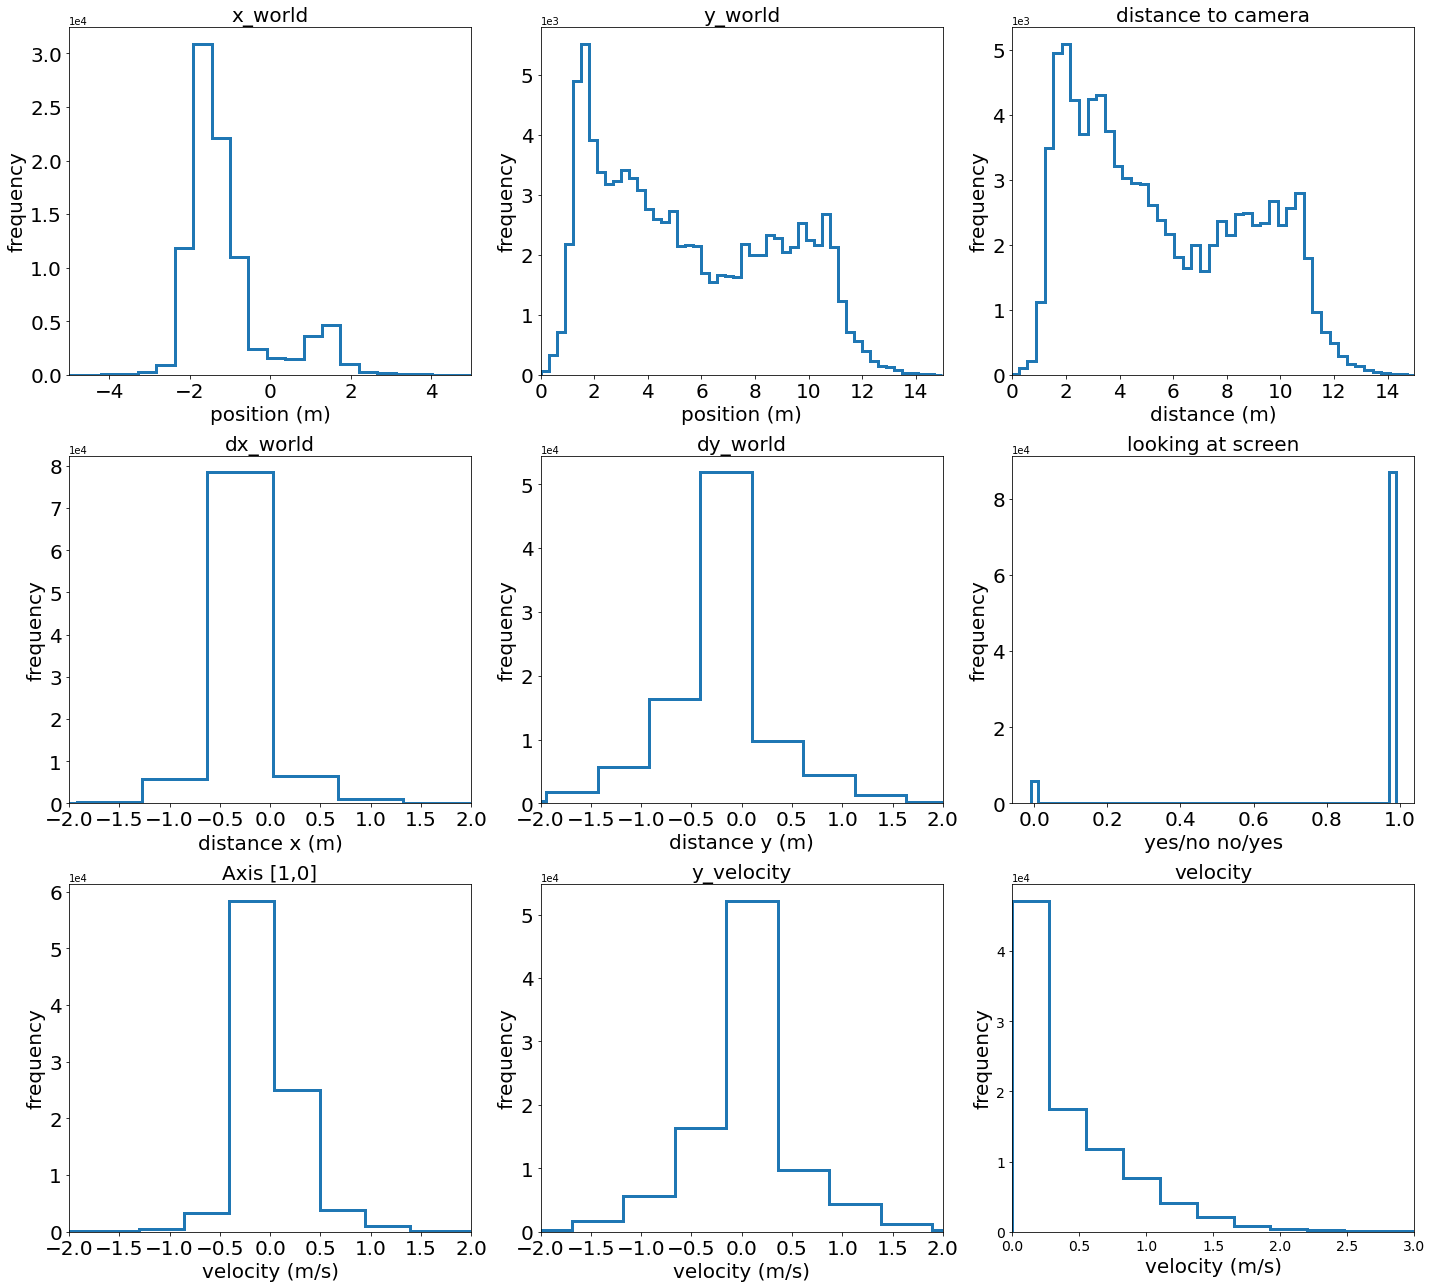

In [33]:
# Template to plot the features

fig = plt.figure(figsize = (20,18)) # width x height
textsize = 20



ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)


ax1 = df_inst1["x_world"].plot.hist(
    bins=50, histtype =u"step", alpha=1,  by=df_final["poi_id"], xlim=(-5, 5),linewidth = 3, fontsize=textsize, ax = ax1, align = 'left')
ax1.set_title('x_world', fontsize=textsize)
ax1.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
ax1.set(xlabel='position (m)', ylabel='frequency')
ax1.yaxis.get_label().set_fontsize(textsize)
ax1.xaxis.get_label().set_fontsize(textsize)
ax1.ticklabel_format(axis='both', style='sci')


ax2 = df_inst1["y_world"].plot.hist(
    bins=50, histtype =u"step", alpha=1, by=df_final["poi_id"], xlim=(0, 15), linewidth = 3, fontsize=textsize,  ax = ax2)
ax2.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

ax2.set_title('y_world', fontsize=textsize)
ax2.set(xlabel='position (m)', ylabel='frequency')
ax2.yaxis.get_label().set_fontsize(textsize)
ax2.xaxis.get_label().set_fontsize(textsize)

ax3 = df_inst1["distance_to_camera"].plot.hist(
    bins=50, histtype =u"step", alpha=1, align = 'left', by=df_final["poi_id"],xlim=(0, 15), linewidth = 3, fontsize=textsize,  ax = ax3)
ax3.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

ax3.set_title('distance to camera', fontsize=textsize)
ax3.set(xlabel='distance (m)', ylabel='frequency')
ax3.yaxis.get_label().set_fontsize(textsize)
ax3.xaxis.get_label().set_fontsize(textsize)

  
ax4 = df_inst1["dx_world"].plot.hist(
    bins=50, histtype =u"step", alpha=1,  by=df_final["poi_id"], xlim=(-2, 2), linewidth = 3, fontsize=textsize,  align = 'left', ax = ax4)
ax4.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

ax4.set_title('dx_world', fontsize=textsize)
ax4.set(xlabel='distance x (m)', ylabel='frequency')
ax4.yaxis.get_label().set_fontsize(textsize)
ax4.xaxis.get_label().set_fontsize(textsize)

ax5 = df_inst1["dy_world"].plot.hist(
    bins=50, histtype =u"step", alpha=1, by=df_final["poi_id"], xlim=(-2, 2), linewidth = 3, fontsize=textsize,  align = 'left', ax = ax5)
ax5.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

ax5.set_title('dy_world', fontsize=textsize)
ax5.set(xlabel='distance y (m)', ylabel='frequency')
ax5.yaxis.get_label().set_fontsize(textsize)
ax5.xaxis.get_label().set_fontsize(textsize)

ax6 = df_inst1["looking_at_screen"].plot.hist(
    bins=50, histtype =u"step", alpha=1,  by=df_final["poi_id"], linewidth = 3, fontsize=textsize,  align = 'left', ax = ax6)
ax6.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

ax6.set_title('looking at screen', fontsize=textsize)
ax6.set(xlabel='yes/no no/yes', ylabel='frequency')
ax6.yaxis.get_label().set_fontsize(textsize)
ax6.xaxis.get_label().set_fontsize(textsize)

ax7 = df_inst1["x_velocity"].plot.hist(
    bins=50, histtype =u"step", alpha=1,  by=df_final["poi_id"],xlim=(-2, 2), linewidth = 3, fontsize=textsize,  ax = ax7)
ax7.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

ax7.set_title('Axis [1,0]', fontsize=textsize)
ax7.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

ax7.set(xlabel='velocity (m/s)', ylabel='frequency')
ax7.yaxis.get_label().set_fontsize(textsize)
ax7.xaxis.get_label().set_fontsize(textsize)


ax8 = df_inst1["y_velocity"].plot.hist(
    bins=50, histtype =u"step", alpha=1,  by=df_final["poi_id"], xlim=(-2, 2),linewidth = 3, fontsize=textsize,  ax = ax8)
ax8.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

ax8.set_title('y_velocity', fontsize=textsize)
ax8.set(xlabel='velocity (m/s)', ylabel='frequency')
ax8.yaxis.get_label().set_fontsize(textsize)
ax8.xaxis.get_label().set_fontsize(textsize)

ax9 = df_inst1["velocity"].plot.hist(
    bins=50, histtype =u"step", alpha=1, by=df_final["poi_id"],xlim=(-0, 3), linewidth = 3, fontsize=textsize,  ax = ax9)
ax9.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

ax9.set_title('velocity', fontsize=textsize)
ax9.set(xlabel='velocity (m/s)', ylabel='frequency')
ax9.yaxis.get_label().set_fontsize(textsize)
ax9.xaxis.get_label().set_fontsize(textsize)
ax9.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))



plt.xticks(fontsize=textsize)
plt.yticks(fontsize=textsize)
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()


## Plot distance to camera by installation

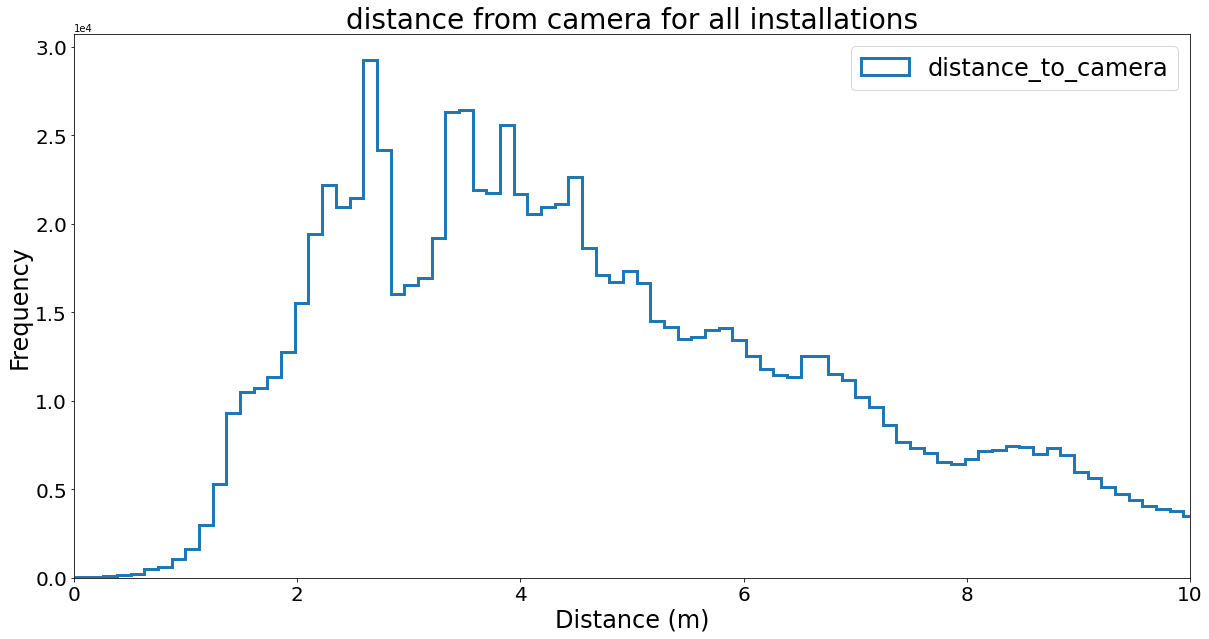

<Figure size 432x288 with 0 Axes>

In [34]:
# df_d = np.sqrt(df_final["y_world"]**2 + df_final["x_world"]**2)

df_grouped = df_final.groupby("poi_id")

ax = df_final["distance_to_camera"].plot.hist(
    bins=300, histtype =u"step", alpha=1, xlim=(0, 10), by=df_grouped["poi_id"], linewidth = 3, figsize=(20, 10)
)
d_mean = df_final["distance_to_camera"].mean


plt.legend(fontsize=24)
# plt.tight_layout()
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.title("distance from camera for all installations", fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Distance (m)", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.savefig("distance_from_camera.png", dpi=100)
plt.show()
plt.draw()

None

In [35]:
df_final["poi_id"].unique()

array([444, 450, 453, 456, 457, 466, 529])

## Distribution of dy_world and dx_world

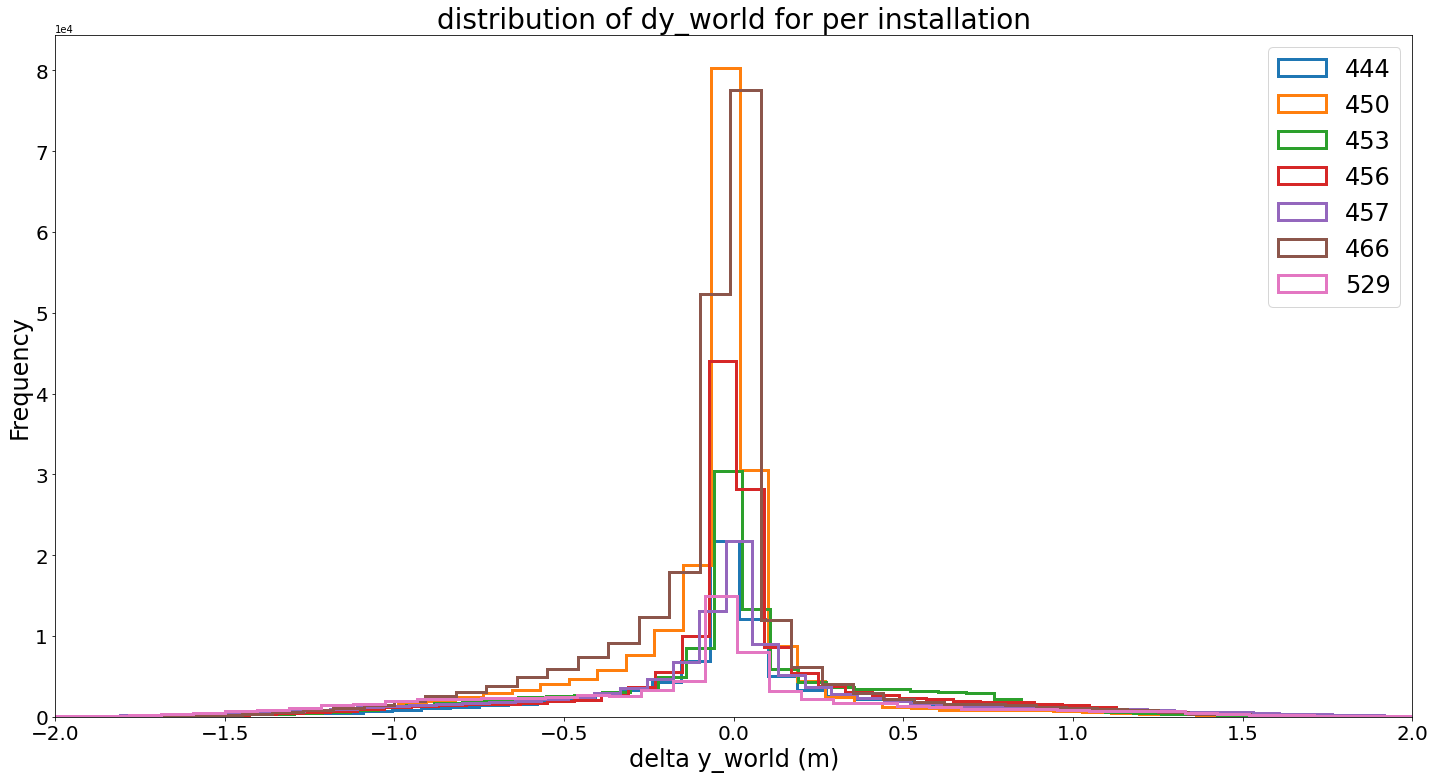

<Figure size 432x288 with 0 Axes>

In [36]:
df_grouped = df_final.groupby("poi_id")

ax = df_grouped["dy_world"].plot.hist(
    bins=300, histtype =u"step", alpha=1, xlim=(-2, 2), figsize=(20, 10), linewidth = 3
)
mean_y = df_final["dy_world"].mean

plt.tight_layout()
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.title("distribution of dy_world for per installation", fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("delta y_world (m)", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.legend(fontsize=24)
plt.savefig("dy_world.png", dpi=100)
plt.show()
plt.draw()

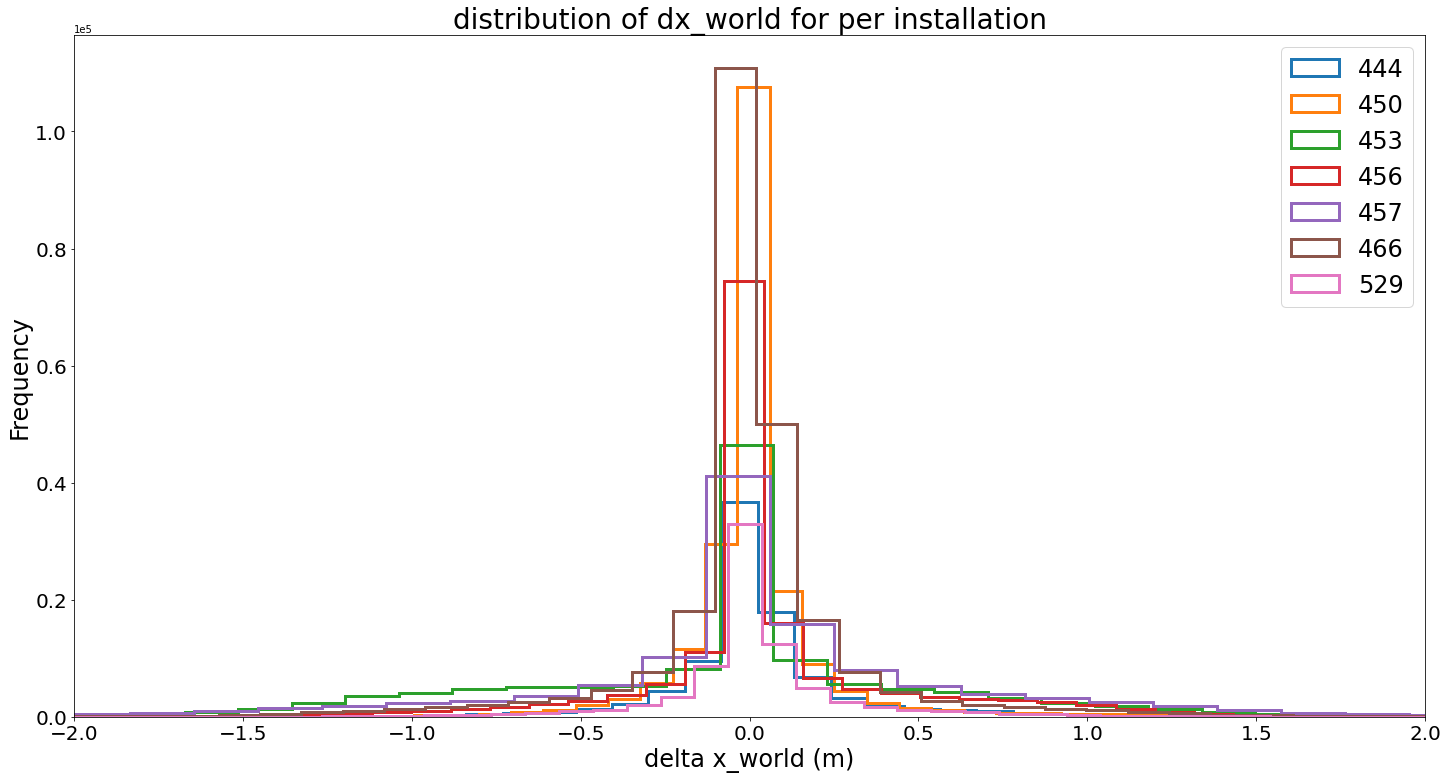

<Figure size 432x288 with 0 Axes>

In [37]:
df_grouped = df_final.groupby("poi_id")

ax = df_grouped["dx_world"].plot.hist(
    bins=300, xlim=(-2, 2), figsize=(20, 10),histtype =u"step", alpha=1,linewidth = 3
)
mean_x = df_grouped["dx_world"].mean

# ax.set_xlabel("dy_world", fontsize=14)
# ax.set_ylabel("frequency", fontsize=14)
# ax.tick_params(axis='both', which='major', labelsize=12)
# ax.text(2, 35000, "μ_dy = - 0.5 m" ,fontsize=14, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=1))
plt.tight_layout()
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.title("distribution of dx_world for per installation", fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("delta x_world (m)", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.legend(fontsize=24)
plt.savefig("dx_world.png", dpi=100)
plt.show()
plt.draw()

## Distribution of velocity per installation:

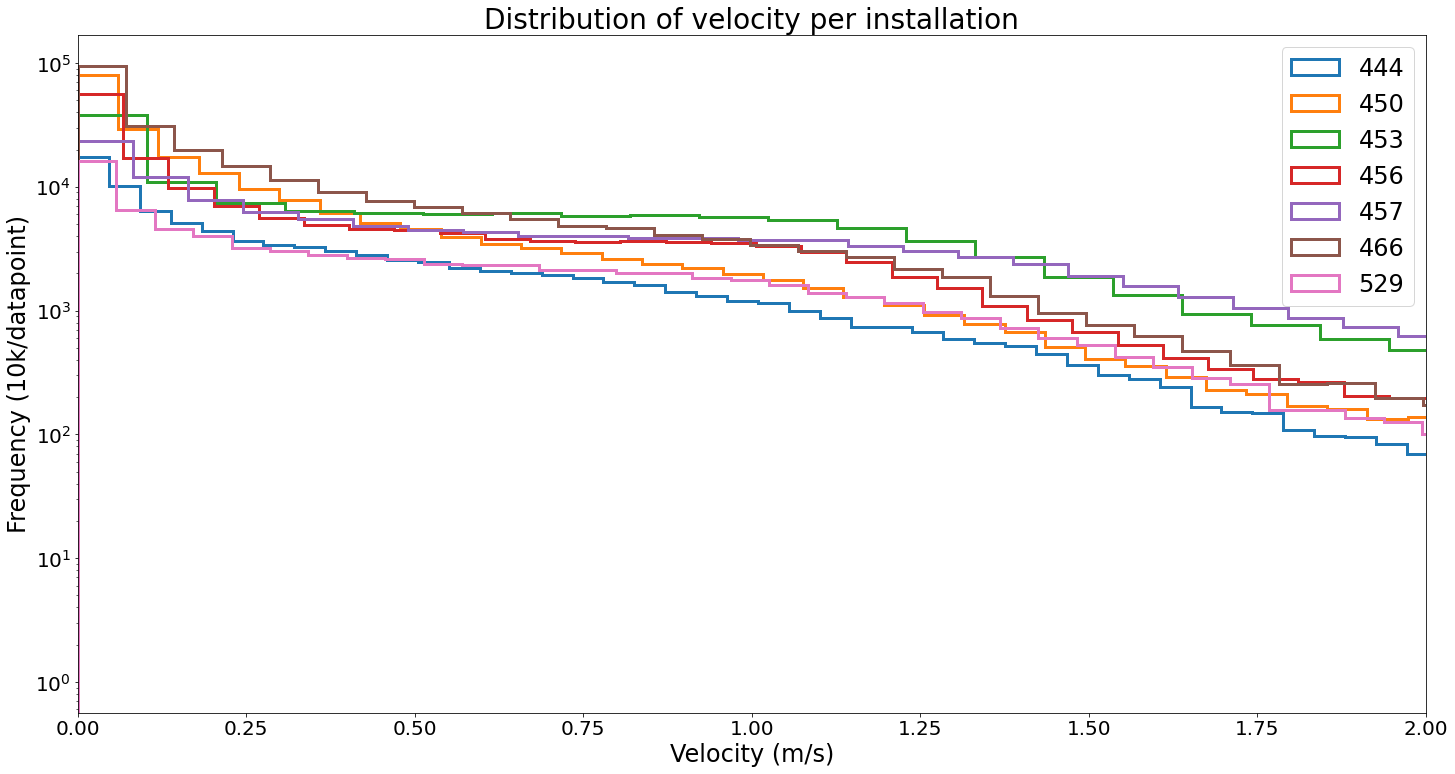

<Figure size 432x288 with 0 Axes>

In [38]:
df_grouped = df_final.groupby("poi_id")
ax = df_grouped["velocity"].plot.hist(
    by="poi_id", bins=300, xlim=(0, 2), figsize=(20, 10),histtype =u"step", alpha=1,linewidth = 3)


plt.tight_layout()
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.yscale("log")
plt.title("Distribution of velocity per installation", fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Velocity (m/s)", fontsize=24)
plt.ylabel("Frequency (10k/datapoint)", fontsize=24)
plt.legend(fontsize=24)
plt.savefig("velocity.png", dpi=100)
plt.show()
plt.draw()

## Checking the mean velocity across all installations

In [39]:
df_final["velocity"].median()
df_final["velocity"].mean()

0.45267754214990946

## Plotting trajectories per installation

In [40]:
def name(**variables):
        return [x for x in variables]

In [41]:
from varname import nameof


In [42]:
def plot_all_name(df_inst, No_of_ppl,  name):

    fig, ax = plt.subplots(figsize = (10,10))
    
    ax.scatter(df_inst["x_world"],df_inst["y_world"], color="k", marker = 'o', s = 10, alpha = 0.1, linewidth = 3)
    ax.set_xlabel("x (m)", fontsize=30)
    ax.set_ylabel("y (m)", fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.text(0, 0, "A" ,fontsize=35, horizontalalignment='center', color = "pink", verticalalignment='center', bbox=dict(facecolor='none', edgecolor='none', alpha=1))
    #ax.set_title("positions of all people each second over 3 days" + name[7::], fontsize="30")
    ax.set_title("positions of all people /sec over 1 week ", fontsize="30")

    plt.xlim((-7.5, 7.5)) 
    plt.ylim((-1, 15))  

    plt.savefig("allppl_path_" + name + ".png", dpi=100)    
    plt1 = plt.show()
    plt.draw()

    return (plt1)

None

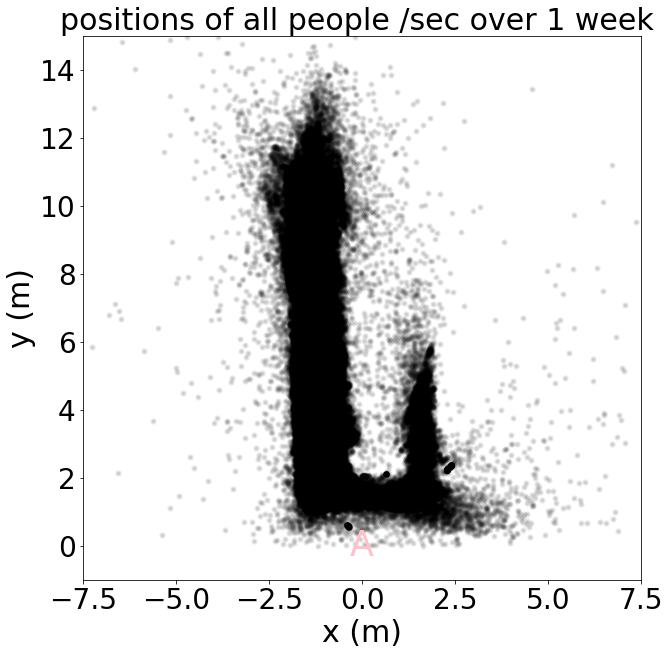

<Figure size 432x288 with 0 Axes>

In [43]:
plot_all_name(df_inst1, 10, nameof(df_inst1))

In [44]:
def name(**variables):
        return [x for x in variables]

In [94]:
def plot_installation(df_inst, No_of_ppl, name):


    def plot_personpath(p_id):
        df_p=df_inst.loc[df["person_id"]== p_id]
        x_pos = df_p["x_world"]
        y_pos = df_p["y_world"]
        x_direct = df_p["dx_world"]
        y_direct = df_p["dy_world"]
        scl = np.mean((x_direct**2 + y_direct**2)**0.5)
        return (x_pos,y_pos,x_direct,y_direct, scl)

    persons=df["person_id"].unique()
    persons = persons[0:No_of_ppl:3]
    len(persons)

    from matplotlib.pyplot import cm
    n = len(persons)
    color=cm.jet(np.linspace(0,1,n))

    fig, ax = plt.subplots(figsize = (10,10))

    for p in range(len(persons)):

        x_pos,y_pos,x_direct,y_direct, scl = plot_personpath(persons[p])
        ax.quiver(x_pos,y_pos,x_direct,y_direct, scale_units='xy', angles='xy', scale=1, color=color[p], linewidth = 0.5, headwidth = 2, headlength = 4)

    ax.set_xlabel("x_world", fontsize=16)
    ax.set_ylabel("y_world", fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.text(0, 0, "A" ,fontsize=20, horizontalalignment='center', 
                verticalalignment='center', bbox=dict(facecolor='white', edgecolor='none', alpha=1))

    ax.set_aspect(1)
    ax.set_title("position prediction", fontsize="25")
    
    plt.xlim(-7.5, 7.5)
    plt.ylim(-1, 15)
    ax.set_xlabel("x (m)", fontsize=25)
    ax.set_ylabel("y (m)", fontsize=25)
    ax.tick_params(axis="both", which="major", labelsize=23)
    
    plt.savefig("all_path_" + name + ".png", dpi=100)
    plt1 = plt.show()
    plt.draw()

    return (plt1)

None

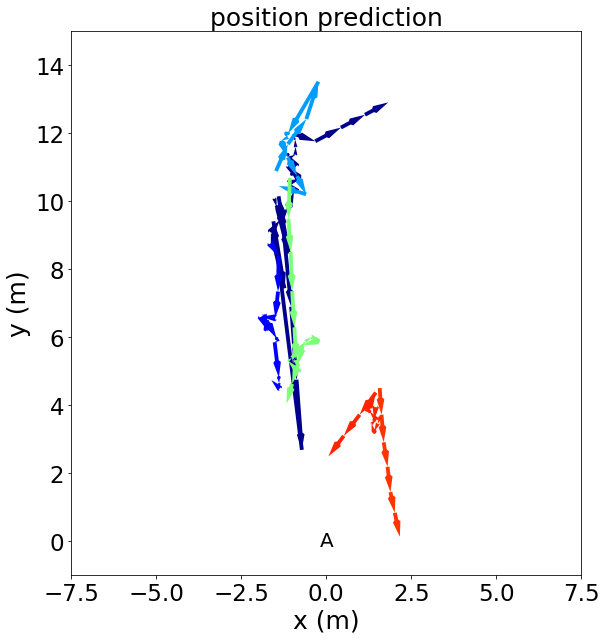

<Figure size 432x288 with 0 Axes>

In [149]:
plot_installation(df_inst1,1000, nameof(df_inst1))

In [99]:
df_test = df_inst1.head(100)

In [102]:
df_test

,index,poi_id,person_id,looking_at_screen,rolling_exp_age,rolling_exp_gender,local_timestamp,headpose_yaw,headpose_pitch,headpose_roll,...,x_velocity,y_velocity,velocity,distance_to_camera,ema_5_x,ema_5_y,ema_5_velocity,ema_10_x,ema_10_y,ema_10_velocity
6428,6554,444,0047d246-d473-45a7-9876-c2c276606be7,1,NaN,NaN,2020-07-06 14:06:28,NaN,NaN,NaN,...,-0.794310,0.806011,1.131629,1.384232,-0.794310,0.806011,1.131629,-0.794310,0.806011,1.131629
6431,6557,444,0047d246-d473-45a7-9876-c2c276606be7,1,NaN,NaN,2020-07-06 14:06:29,NaN,NaN,NaN,...,-0.297551,1.268585,1.303014,2.190921,-0.496255,1.083556,1.234460,-0.521093,1.060427,1.225891
6434,6560,444,0047d246-d473-45a7-9876-c2c276606be7,1,NaN,NaN,2020-07-06 14:06:30,NaN,NaN,NaN,...,0.060063,1.286572,1.287973,3.493658,-0.232736,1.179721,1.259808,-0.287472,1.151336,1.250847
6437,6563,444,0047d246-d473-45a7-9876-c2c276606be7,1,NaN,NaN,2020-07-06 14:06:31,NaN,NaN,NaN,...,0.068145,1.287409,1.289212,4.749725,-0.107755,1.224453,1.272022,-0.170312,1.196166,1.263487
6476,6602,444,0047d246-d473-45a7-9876-c2c276606be7,1,NaN,NaN,2020-07-06 14:06:32,NaN,NaN,NaN,...,-0.015968,0.788368,0.788529,6.019295,-0.072519,1.057046,1.086416,-0.126004,1.079098,1.127139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189625,1227533,444,006b0282-7680-4f99-8caa-0c7e989cf225,1,35.0,female,2020-07-09 10:43:44,36.0,6.0,23.0,...,-0.663439,0.108936,0.672323,1.849852,-0.382388,0.203581,0.504442,-0.212398,0.233462,0.417845
1189629,1227537,444,006b0282-7680-4f99-8caa-0c7e989cf225,1,36.0,female,2020-07-09 10:43:45,55.0,15.0,24.0,...,-0.147733,-0.102571,0.179850,1.837867,-0.304170,0.101530,0.396245,-0.200641,0.172365,0.374573
1189633,1227541,444,006b0282-7680-4f99-8caa-0c7e989cf225,1,37.0,male,2020-07-09 10:43:46,42.0,2.0,19.0,...,-0.003411,0.038611,0.038762,1.742046,-0.203917,0.080557,0.277084,-0.164781,0.148046,0.313517
1189637,1227545,444,006b0282-7680-4f99-8caa-0c7e989cf225,1,36.0,male,2020-07-09 10:43:47,60.0,351.0,21.0,...,0.007042,0.002743,0.007557,1.780808,-0.133597,0.054619,0.187242,-0.133540,0.121627,0.257888


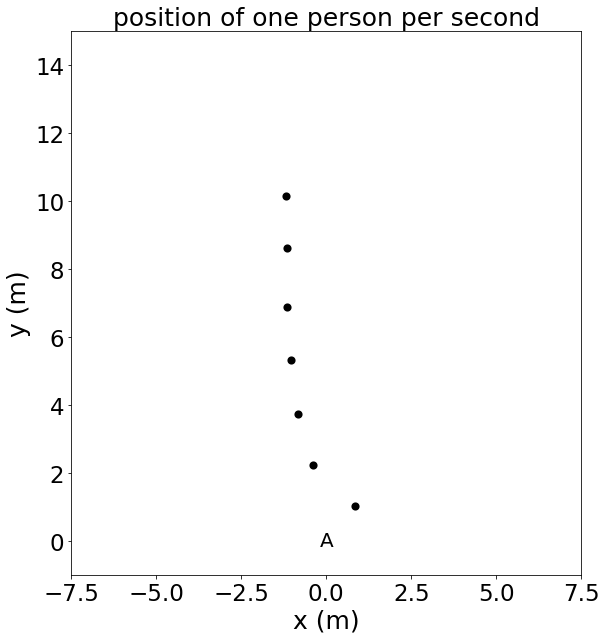

<Figure size 432x288 with 0 Axes>

In [148]:

df_p=df_inst1.loc[df["person_id"]== "01304ac8-446e-4fa3-9e07-06644cf6a438"]
x_pos = df_p["x_world"]
y_pos = df_p["y_world"]
x_direct = df_p["dx_world"]
y_direct = df_p["dy_world"]
scl = np.mean((x_direct**2 + y_direct**2)**0.5)


 

fig, ax = plt.subplots(figsize = (10,10))


#x_pos,y_pos,x_direct,y_direct, scl = plot_personpath(persons[p])
#ax.quiver(x_pos,y_pos,x_direct,y_direct, scale_units='xy', angles='xy', scale=1, color="hotpink", linewidth = 1, headwidth = 2, headlength = 4)

ax.scatter(df_p["x_world"],
        df_p["y_world"],
        color="k",
        marker="o",
        s=10,
        alpha=1,
        linewidth=5)

ax.set_xlabel("x_world", fontsize=16)
ax.set_ylabel("y_world", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.text(0, 0, "A" ,fontsize=20, horizontalalignment='center', 
            verticalalignment='center', bbox=dict(facecolor='white', edgecolor='none', alpha=1))

ax.set_aspect(1)
ax.set_title("position of one person per second", fontsize="25")

plt.xlim(-7.5, 7.5)
plt.ylim(-1, 15)
ax.set_xlabel("x (m)", fontsize=25)
ax.set_ylabel("y (m)", fontsize=25)
ax.tick_params(axis="both", which="major", labelsize=23)

plt.savefig("one_person.png", dpi=100)
plt1 = plt.show()
plt.draw()



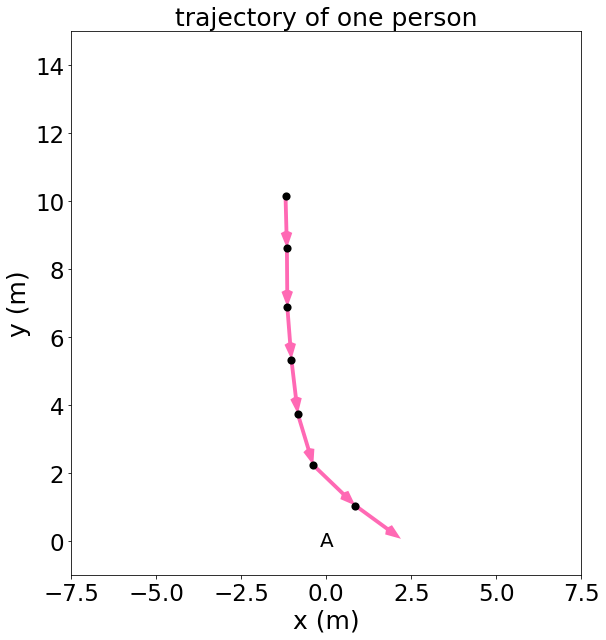

<Figure size 432x288 with 0 Axes>

In [147]:

df_p=df_inst1.loc[df["person_id"]== "01304ac8-446e-4fa3-9e07-06644cf6a438"]
x_pos = df_p["x_world"]
y_pos = df_p["y_world"]
x_direct = df_p["dx_world"]
y_direct = df_p["dy_world"]
scl = np.mean((x_direct**2 + y_direct**2)**0.5)


 

fig, ax = plt.subplots(figsize = (10,10))


#x_pos,y_pos,x_direct,y_direct, scl = plot_personpath(persons[p])
ax.quiver(x_pos,y_pos,x_direct,y_direct, scale_units='xy', angles='xy', scale=1, color="hotpink", linewidth = 2, headwidth = 3, headlength = 4)

ax.scatter(df_p["x_world"],
        df_p["y_world"],
        color="k",
        marker="o",
        s=10,
        alpha=1,
        linewidth=5)

ax.set_xlabel("x_world", fontsize=16)
ax.set_ylabel("y_world", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.text(0, 0, "A" ,fontsize=20, horizontalalignment='center', 
            verticalalignment='center', bbox=dict(facecolor='white', edgecolor='none', alpha=1))

ax.set_aspect(1)
ax.set_title("trajectory of one person", fontsize="25")

plt.xlim(-7.5, 7.5)
plt.ylim(-1, 15)
ax.set_xlabel("x (m)", fontsize=25)
ax.set_ylabel("y (m)", fontsize=25)
ax.tick_params(axis="both", which="major", labelsize=23)

plt.savefig("one_person.png", dpi=100)
plt1 = plt.show()
plt.draw()



In [146]:
df_inst1["person_id"].unique()[:20]

array(['0047d246-d473-45a7-9876-c2c276606be7',
       '004ff56a-5619-4743-abb9-23e7d6f9c861',
       '005b99ab-9c91-4c19-9caa-e58dbbdce591',
       '006b0282-7680-4f99-8caa-0c7e989cf225',
       '008a26b6-bf91-4187-8936-a49274cf2499',
       '008b0744-193a-4156-b913-60b76a7531f2',
       '0093da97-d6ba-4cd5-afb0-32188a344005',
       '00a0ad73-6b49-4fcf-a30d-0f9a95ec3743',
       '00ac1655-41e5-432b-ae1d-bd859d97ddef',
       '00ac6b63-fcb7-4f35-96cb-a6c769436a12',
       '00b2e3ab-ddb2-4fed-827e-6416d82675af',
       '00c54ce6-d1ec-4093-8ecf-d3ef218e3a1f',
       '00cd84d7-0f26-4cbd-be1e-9b71b8f4629e',
       '00d10563-2823-4dcd-9212-fbbde3c063a0',
       '00dfba79-3edb-4f53-87d2-c732b556b256',
       '00e9103c-8643-4eb3-8a2d-72c87c6dd27e',
       '00f2d3bf-775a-440b-a6d2-8074129e2164',
       '01304ac8-446e-4fa3-9e07-06644cf6a438',
       '0132afab-7437-4cc2-bdbb-a532a6efde53',
       '0138f5a5-52ca-4518-a515-06f32ea044d6'], dtype=object)

In [48]:
df_inst_person = df_inst1.loc[
    df_inst1["person_id"] == "0047d246-d473-45a7-9876-c2c276606be7" 
]

df_inst_person2 = df_inst1.loc[
    df_inst1["person_id"] == "004ff56a-5619-4743-abb9-23e7d6f9c861"]

result = pd.concat([df_inst_person, df_inst_person2], axis=1, sort=False)

In [51]:
result.head()

,index,poi_id,person_id,looking_at_screen,rolling_exp_age,rolling_exp_gender,local_timestamp,headpose_yaw,headpose_pitch,headpose_roll,...,x_velocity,y_velocity,velocity,distance_to_camera,ema_5_x,ema_5_y,ema_5_velocity,ema_10_x,ema_10_y,ema_10_velocity
6428,6554.0,444.0,0047d246-d473-45a7-9876-c2c276606be7,1.0,NaN,NaN,2020-07-06 14:06:28,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6431,6557.0,444.0,0047d246-d473-45a7-9876-c2c276606be7,1.0,NaN,NaN,2020-07-06 14:06:29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6434,6560.0,444.0,0047d246-d473-45a7-9876-c2c276606be7,1.0,NaN,NaN,2020-07-06 14:06:30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6437,6563.0,444.0,0047d246-d473-45a7-9876-c2c276606be7,1.0,NaN,NaN,2020-07-06 14:06:31,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6476,6602.0,444.0,0047d246-d473-45a7-9876-c2c276606be7,1.0,NaN,NaN,2020-07-06 14:06:32,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df_inst1["person_id"].unique()

array(['0047d246-d473-45a7-9876-c2c276606be7',
       '004ff56a-5619-4743-abb9-23e7d6f9c861',
       '005b99ab-9c91-4c19-9caa-e58dbbdce591', ...,
       'ffdbd00a-6280-4017-a10f-e66713e553e0',
       'ffdcd69c-316b-4d04-8db1-6dcb36187d2f',
       'ffe50a05-ea9b-4db8-acd0-412d1dbc36e7'], dtype=object)

In [161]:
len(df_inst)

7

In [440]:
def plot_one_person_c(df_inst, No_of_ppl, name):

    fig, ax = plt.subplots(figsize=(10, 10))
    
    ax.scatter(
        df_inst["x_world"][2:3],
        df_inst["y_world"][2:3],
        color="w",
        edgecolor='deeppink',
        marker="o",
        s=50,
        alpha=1,
        linewidth=3,
    )
    
    ax.scatter(
        df_inst["x_world"][1:2],
        df_inst["y_world"][1:2],
        color="w",
        edgecolor='deeppink',
        marker="o",
        s=500,
        alpha=1,
        linewidth=3,
    )
    
    ax.scatter(
        df_inst["x_world"][0:1],
        df_inst["y_world"][0:1],
        color="w",
        edgecolor='deeppink',
        marker="o",
        s=1100,
        alpha=1,
        linewidth=3
    )
    
    ax.scatter(
        df_inst["x_world"][0:14],
        df_inst["y_world"][0:14],
        color="k",
        edgecolor='k',
        marker=".",
        s=50,
        alpha=1,
        linewidth=3,
    )
    

    ax.set_xlabel("x (m)", fontsize=25)
    ax.set_ylabel("y (m)", fontsize=25)
    ax.tick_params(axis="both", which="major", labelsize=23)
    
    
    ax.text(
        0,
        0,
        "A",
        fontsize=25,
        horizontalalignment="center",
        verticalalignment="center", color = "deeppink",
        bbox=dict(facecolor="none", edgecolor="none", alpha=1),
    )
    
    ax.text(
        2.4,
        1.4,
        "in 5 sec",
        fontsize=18,
        horizontalalignment="center",
        verticalalignment="center",
        bbox=dict(facecolor="none", edgecolor="none", alpha=1),
    )
    
    ax.text(
        1.5,
        2.2,
        "in 2 sec",
        fontsize=18,
        horizontalalignment="center",
        verticalalignment="center",
        bbox=dict(facecolor="none", edgecolor="none", alpha=1),
    )
        
    ax.text(
        1,
        3.4,
        "in 1 sec",
        fontsize=18,
        horizontalalignment="center",
        verticalalignment="center",
        bbox=dict(facecolor="none", edgecolor="none", alpha=1),
    )    
    ax.set_aspect(1)
    ax.set_title("position prediction", fontsize="25")
    
    plt.xlim(-7.5, 7.5)
    plt.ylim(-1, 15)

    plt.savefig("allppl_path_" + name + ".png", dpi=100)
    plt1 = plt.show()
    plt.draw()

    return plt1


None

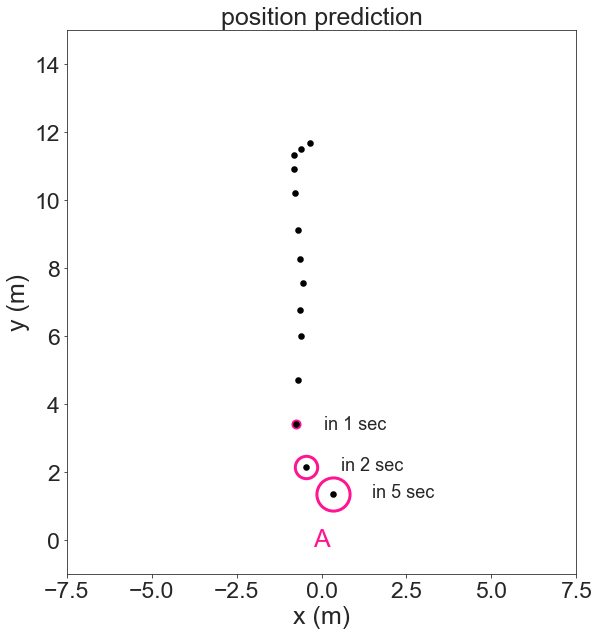

<Figure size 432x288 with 0 Axes>

In [441]:
plot_one_person_c(df_inst_person, 1, nameof(df_inst1))

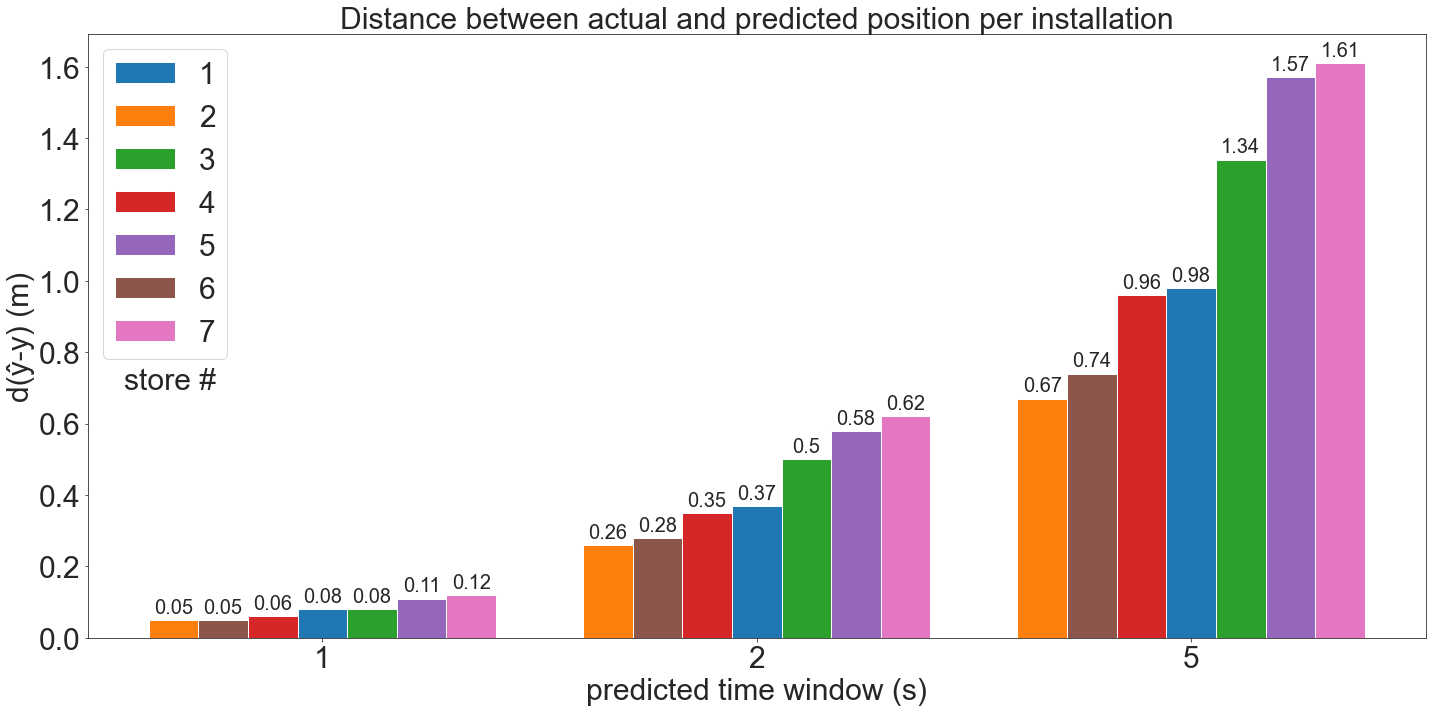

In [369]:
# goal 3

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(20, 10))
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

N = 3
time = (1, 2, 5)
i444 = (0.08, 0.37, 0.98)
i450 = (0.05, 0.26, 0.67)
i453 = (0.08, 0.50, 1.34)
i456 = (0.06, 0.35, 0.96)
i457 = (0.11, 0.58, 1.57)
i466 = (0.05, 0.28, 0.74)
i529 = (0.12, 0.62, 1.61)

x = np.arange(len(time))  # the label locations
width = 0.8       # the width of the bars: can also be len(x) sequence




rects4 = ax.bar(x  , i444, width/7, label='1')
rects1 = ax.bar(x - width/7*3, i450, width/7, label='2')
rects5 = ax.bar(x + width/7, i453, width/7, label='3')
rects3 = ax.bar(x - width/7, i456, width/7, label='4')
rects6 = ax.bar(x + width/7*2, i457, width/7, label='5')
rects2 = ax.bar(x - width/7*2, i466, width/7, label='6')
rects7 = ax.bar(x + width/7*3, i529, + width/7, label='7')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_xticks(x)
ax.set_xticklabels(time)
ax.legend()

ax.text(
        -0.35,
        0.72,
        "store #",
        fontsize=30,
        horizontalalignment="center",
        verticalalignment="center",
        bbox=dict(facecolor="none", edgecolor="none", alpha=1),
    )   
    
    
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 20)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)


ax.tick_params(axis="both", which="major", labelsize=30)
plt.xlabel("predicted time window (s)", fontsize=30)
plt.ylabel("d(ŷ-y) (m)", fontsize=30)
ax.figure.axes[-1].tick_params(labelsize=30)
plt.rc('legend', fontsize=30)
ax.set_title("Distance between actual and predicted position per installation", fontsize=30)

fig.tight_layout()
plt.show()

